C:\Users\Minseok\AppData\Local\Temp\ipykernel_22836\636412850.py:79: UserWarning: frames=<generator object quick_sort at 0x00000185F06B34C0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, frames=generator, interval=300, repeat=False)


C:\Users\Minseok\anaconda3\Lib\site-packages\matplotlib\animation.py:1719: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


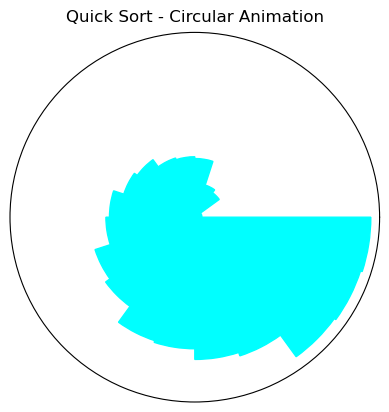

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import random
from IPython.display import HTML

# 무작위 데이터 생성
def generate_data(n=20, max_val=100):
    return [random.randint(1, max_val) for _ in range(n)]
    
def quick_sort(data):
    # 배열을 분할하는 함수
    def partition(data, low, high):
        # 피벗(Pivot) 값을 설정 (배열의 마지막 요소를 피벗으로 선택)
        pivot = data[high]
        # i는 피벗보다 작은 값의 경계를 나타내는 인덱스
        i = low - 1

        # 배열의 low부터 high - 1까지 반복
        for j in range(low, high):
            yield data, i + 1, j, high  # 현재 비교 상태를 반환 (애니메이션용)
            # 현재 요소가 피벗보다 작으면
            if data[j] < pivot:
                i += 1  # i의 인덱스를 증가
                # i와 j 위치의 값을 교환
                data[i], data[j] = data[j], data[i]
                yield data, i, j, high  # 교환 후의 상태를 반환 (애니메이션용)

        # 피벗과 피벗보다 큰 값 중 첫 번째 값을 교환하여 피벗을 올바른 위치로 이동
        data[i + 1], data[high] = data[high], data[i + 1]
        # 피벗의 최종 위치를 반환
        return i + 1

    # 재귀적으로 퀵 정렬을 수행하는 함수
    def quick_sort_recursive(data, low, high):
        # 배열 크기가 2 이상일 때만 정렬 수행
        if low < high:
            # Partition 함수 호출하여 피벗의 최종 위치를 얻음
            pi = yield from partition(data, low, high)

            # 피벗 왼쪽 부분에 대해 재귀적으로 정렬
            yield from quick_sort_recursive(data, low, pi - 1)
            # 피벗 오른쪽 부분에 대해 재귀적으로 정렬
            yield from quick_sort_recursive(data, pi + 1, high)

    # 전체 배열에 대해 퀵 정렬 수행
    yield from quick_sort_recursive(data, 0, len(data) - 1)
    yield data, -1, -1, -1  # 정렬 완료 상태 반환 (애니메이션용)


data = generate_data()

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
angles = np.linspace(0, 2 * np.pi, len(data), endpoint=False)
bars = ax.bar(angles, data, width=2 * np.pi / len(data), align='edge', color='limegreen')
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Quick Sort - Circular Animation", va='bottom')

def update(frame):
    current_data, idx1, idx2, pivot_idx = frame
    for idx, (bar, value) in enumerate(zip(bars, current_data)):
        bar.set_height(value)
        if idx == idx1:
            bar.set_color("yellow")  # 비교 중인 요소
        elif idx == idx2:
            bar.set_color("red")  # 스왑 대상 요소
        elif idx == pivot_idx:
            bar.set_color("blue")  # Pivot 요소
        else:
            bar.set_color("limegreen")  # 기본 상태

    # 정렬 완료 상태를 표시
    if idx1 == -1 and idx2 == -1 and pivot_idx == -1:
        for bar in bars:
            bar.set_color("cyan")  # 정렬 완료 시 모든 바를 Cyan으로 설정

generator = quick_sort(data[:])
ani = FuncAnimation(fig, update, frames=generator, interval=300, repeat=False)
HTML(ani.to_html5_video())
